In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf  #自相关图
from statsmodels.tsa.stattools import adfuller as ADF  #平稳性检测
from statsmodels.graphics.tsaplots import plot_pacf    #偏自相关图
from statsmodels.stats.diagnostic import acorr_ljungbox    #白噪声检验
from statsmodels.tsa.arima.model import ARIMA 

In [6]:
file_list = ["..\data\gemini_BTCUSD_day.csv"] 
data = pd.read_csv(file_list[0],index_col="Date")["Open"]
data = data.iloc[::-1]
training_data = data[:1838]
test_data = data[1838:]

In [7]:
print(data.head)

<bound method NDFrame.head of Date
2015-10-08 04:00:00        0.00
2015-10-09 04:00:00      243.60
2015-10-10 04:00:00      245.51
2015-10-11 04:00:00      246.30
2015-10-12 04:00:00      248.98
                         ...   
2022-01-17 04:00:00    42655.12
2022-01-18 04:00:00    42052.76
2022-01-19 04:00:00    41712.63
2022-01-20 04:00:00    41954.50
2022-01-21 04:00:00    38462.49
Name: Open, Length: 2298, dtype: float64>


<AxesSubplot:xlabel='Date'>

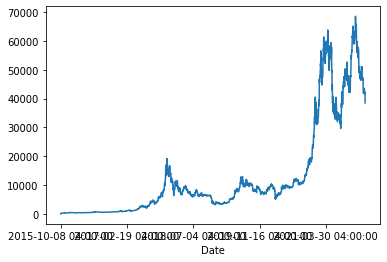

In [8]:
data.plot()

C:\Users\YIZONG~1\AppData\Local\Temp/ipykernel_39028/1137652694.py:1: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  plot_acf(data).show()


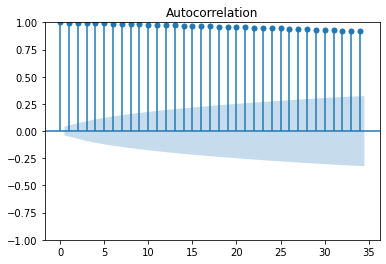

In [9]:
plot_acf(data).show()

In [10]:
ADF(data)

(-1.2232949648398614,
 0.6634953987420151,
 27,
 2270,
 {'1%': -3.433234013272625,
  '5%': -2.8628140850082024,
  '10%': -2.567448254381028},
 36917.35947588075)

<AxesSubplot:xlabel='Date'>

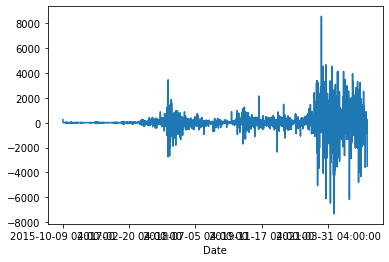

In [11]:
D_data = data.diff().dropna()
D_data.plot()

C:\Users\YIZONG~1\AppData\Local\Temp/ipykernel_39028/2538248294.py:1: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  plot_acf(D_data).show()


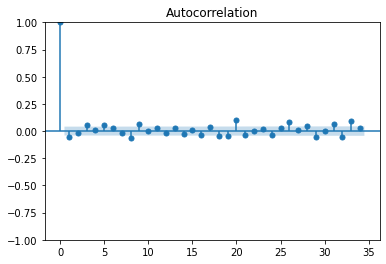

In [17]:
plot_acf(D_data).show()

In [18]:
ADF(D_data)

(-7.064214660042317,
 5.130281316983672e-10,
 27,
 2269,
 {'1%': -3.433235285765301,
  '5%': -2.862814646891805,
  '10%': -2.5674485535435454},
 36892.8942123922)

C:\Users\Yi Zong\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


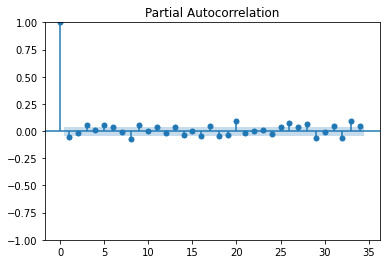

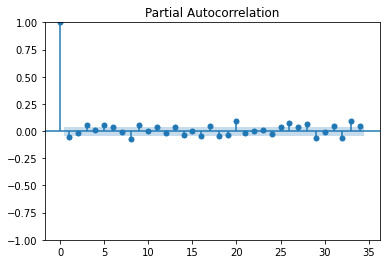

In [19]:
plot_pacf(D_data)

In [20]:
pmax = int(len(D_data)/10)
qmax = int(len(D_data)/10)

Plotting the data. First for  `gemini_BTCUSD_day`

In [21]:
dates = mdates.DateFormatter("%d")
now = time.mktime(time.localtime())
timesstamps = np.linspace(now, now)
plt.figure(figsize=(10,5))
plt.title("gemini_BTCUSD_day")
plt.plot(df[0]["Open"])

NameError: name 'mdates' is not defined

In [22]:
training_data = training_data.astype(float)
pmax = int(len(D_data)*0.8/10) #一般阶数不超过length/10
qmax = int(len(D_data)*0.8/10) #一般阶数不超过length/10
bic_matrix = [] #bic矩阵
for p in range(pmax+1):
    tmp = []
    for q in range(qmax+1):
        try: 
            tmp.append(ARIMA(training_data, order = (p,1,q)).fit().bic)
        except:
            tmp.append(None)
    bic_matrix.append(tmp)

bic_matrix = pd.DataFrame(bic_matrix) #从中可以找出最小值

p,q = bic_matrix.stack().idxmin() #先用stack展平，然后用idxmin找出最小值位置。

model = ARIMA(data, (p,1,q)).fit() #建立ARIMA(0, 1, 1)模型
model.summary2() #给出一份模型报告

C:\Users\Yi Zong\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Yi Zong\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Yi Zong\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Yi Zong\AppData\Local\Packages\PythonSoftwa